In [1]:
import sys
sys.path.append("../../src")
import os
import numpy as np
import matplotlib.pyplot as plt
from sindy_utils import *
import pickle
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
def addNoise(x, noise_ratio):
    signal_power = np.sqrt(np.mean(x**2))
    sigma = noise_ratio*signal_power
    noise = np.random.normal(0, sigma, x.shape)
    xobs = x + noise
    return xobs

In [3]:
save_data = True

In [4]:
# load initial training dataset
# p1_train = np.array([0.9])
# p2_train = np.array([1.0])
p1_train = np.linspace(0.9, 1.1, 5)
p2_train = np.linspace(1.0, 1.2, 5)
num_train = p1_train.size * p2_train.size  # initial number of training +data
dt = 0.005
nx = 64
output_freq = 4
dt = dt * output_freq
nt = int(1000/output_freq) + 1
tstop = dt * (nt-1)
noise_ratio = 0.0

if num_train > 1:
    train_data = pickle.load(open(f"/usr/workspace/he10/data/Vlasov1D1V/{num_train}_m{nx}_tstop{tstop:.2f}_nt{nt}.p", "rb"))
else:
    train_data = pickle.load(open(f"/usr/workspace/he10/data/Vlasov1D1V/1_p1_{p1_train[0]:.2f}_p2_{p2_train[0]:.2f}_tstop{tstop:.2f}_nt{nt}.p", "rb"))
num_wsindy = len(train_data['data'])
input_dim = train_data['data'][0]['x'].shape[1]

for i in range(num_wsindy):
    print(f"case {i}: params: {train_data['param'][i]}, x shape: {train_data['data'][i]['x'].shape}")

case 0: params: [0.9 1. ], x shape: (251, 4096)
case 1: params: [0.95 1.  ], x shape: (251, 4096)
case 2: params: [1. 1.], x shape: (251, 4096)
case 3: params: [1.05 1.  ], x shape: (251, 4096)
case 4: params: [1.1 1. ], x shape: (251, 4096)
case 5: params: [0.9  1.05], x shape: (251, 4096)
case 6: params: [0.95 1.05], x shape: (251, 4096)
case 7: params: [1.   1.05], x shape: (251, 4096)
case 8: params: [1.05 1.05], x shape: (251, 4096)
case 9: params: [1.1  1.05], x shape: (251, 4096)
case 10: params: [0.9 1.1], x shape: (251, 4096)
case 11: params: [0.95 1.1 ], x shape: (251, 4096)
case 12: params: [1.  1.1], x shape: (251, 4096)
case 13: params: [1.05 1.1 ], x shape: (251, 4096)
case 14: params: [1.1 1.1], x shape: (251, 4096)
case 15: params: [0.9  1.15], x shape: (251, 4096)
case 16: params: [0.95 1.15], x shape: (251, 4096)
case 17: params: [1.   1.15], x shape: (251, 4096)
case 18: params: [1.05 1.15], x shape: (251, 4096)
case 19: params: [1.1  1.15], x shape: (251, 4096)
case

(0.0, 6.234097921967246, -7.0, 6.890625)

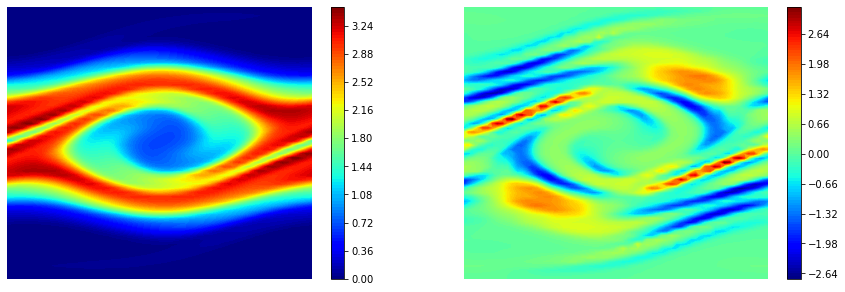

In [5]:
nx = 64
nv = 64
x_min = 0
x_max = 6.2340979219672459E+00
v_min = -7
v_max = 6.8906250000000000E+00
x_mesh = np.linspace(x_min, x_max, nx)
v_mesh = np.linspace(v_min, v_max, nv)
x_mesh, v_mesh = np.meshgrid(x_mesh, v_mesh)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.contourf(x_mesh, v_mesh, train_data['data'][0]['x'][-1].reshape(nx, nv), 100, cmap=plt.cm.jet)
plt.colorbar()
plt.axis('off')

ax = fig.add_subplot(1,2,2)
plt.contourf(x_mesh, v_mesh, train_data['data'][0]['dx'][-1].reshape(nx, nv), 100, cmap=plt.cm.jet)
plt.colorbar()
plt.axis('off')

In [6]:
print(f"min: {train_data['data'][0]['x'].min()}")
print(f"max: {train_data['data'][0]['x'].max()}")
print(f"mean: {train_data['data'][0]['x'].mean()}")
print(f"std: {train_data['data'][0]['x'].std()}")

min: -0.00010737653120103586
max: 3.7012928380734103
mean: 1.1428092688401823
std: 1.1977708313489916


In [7]:
# if noise_ratio > 0:
#     train_data['data'][0]['x'] = addNoise(train_data['data'][0]['x'], noise_ratio)
# print(f"min: {train_data['data'][0]['x'].min()}")
# print(f"max: {train_data['data'][0]['x'].max()}")
# print(f"mean: {train_data['data'][0]['x'].mean()}")
# print(f"std: {train_data['data'][0]['x'].std()}")

In [8]:
# Normalize data
# x_scaler = MinMaxScaler()
# x_scaler = StandardScaler()
# x_scaler.fit(train_data['data'][0]['x'])
# x_scaler.fit(train_data['data'][0]['x'][-1].reshape(-1,1))
# params_DI['x_min'] = x_scaler.min_
# params_DI['x_scale'] = x_scaler.scale_

ndata = len(train_data['data'])
for i in range(ndata):
    x_max = train_data['data'][i]['x'].max()
    train_data['data'][i]['x'] = train_data['data'][i]['x'] / x_max
    print(f"{i} min: {train_data['data'][i]['x'].min()}")
    print(f"{i} max: {train_data['data'][i]['x'].max()}")
    print(f"{i} mean: {train_data['data'][i]['x'].mean()}")
    print(f"{i} std: {train_data['data'][i]['x'].std()}\n")

# temp = x_scaler.transform(train_data['data'][0]['x'])
# # temp = x_scaler.transform(train_data['data'][0]['x'][-1].reshape(-1,1))
# print(f"min: {temp.min()}")
# print(f"max: {temp.max()}")
# print(f"mean: {temp.mean()}")
# print(f"std: {temp.std()}")

0 min: -2.9010547367802243e-05
0 max: 1.0
0 mean: 0.30875948454676566
0 std: 0.32360877232628077

1 min: -3.266000364734802e-05
1 max: 1.0
1 mean: 0.31719691735737027
1 std: 0.3252644564453482

2 min: -3.666132883385236e-05
2 max: 1.0
2 mean: 0.32539836912661807
2 std: 0.3268095499999193

3 min: -3.8614622592359584e-05
3 max: 1.0
3 mean: 0.3333812345562273
3 std: 0.32827272772153754

4 min: -3.919981747500728e-05
4 max: 1.0
4 mean: 0.34115614183180637
4 std: 0.3296665863878021

5 min: -2.985414540644283e-05
5 max: 1.0
5 mean: 0.30997227462313315
5 std: 0.32481360958067823

6 min: -3.308934114528282e-05
6 max: 1.0
6 mean: 0.3184118954077788
6 std: 0.32645992477516456

7 min: -3.648955438717865e-05
7 max: 1.0
7 mean: 0.32659873604375
7 std: 0.32797938855148956

8 min: -3.923275051927111e-05
8 max: 1.0
8 mean: 0.3345748258221169
8 std: 0.32942311298611293

9 min: -4.0776283540527887e-05
9 max: 1.0
9 mean: 0.34234263011124955
9 std: 0.3307993272404272

10 min: -2.983719582939271e-05
10 max

In [9]:
if noise_ratio > 0:
    for i in range(ndata):
        train_data['data'][i]['x'] = addNoise(train_data['data'][i]['x'], noise_ratio)
        print(f"{i} min: {train_data['data'][i]['x'].min()}")
        print(f"{i} max: {train_data['data'][i]['x'].max()}")
        print(f"{i} mean: {train_data['data'][i]['x'].mean()}")
        print(f"{i} std: {train_data['data'][i]['x'].std()}\n")

(0.0, 6.234097921967246, -7.0, 6.890625)

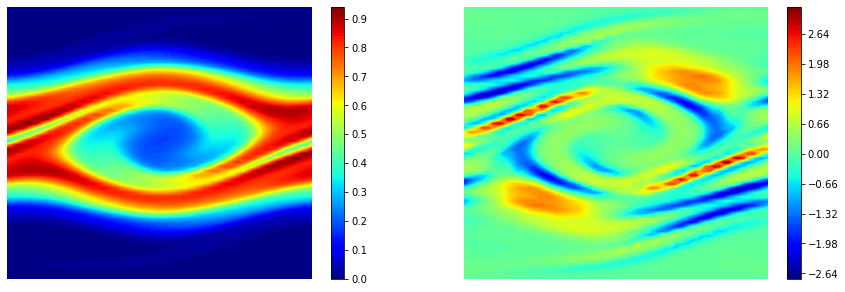

In [10]:
nx = 64
nv = 64
x_min = 0
x_max = 6.2340979219672459E+00
v_min = -7
v_max = 6.8906250000000000E+00
x_mesh = np.linspace(x_min, x_max, nx)
v_mesh = np.linspace(v_min, v_max, nv)
x_mesh, v_mesh = np.meshgrid(x_mesh, v_mesh)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
plt.contourf(x_mesh, v_mesh, train_data['data'][0]['x'][-1].reshape(nx, nv), 100, cmap=plt.cm.jet)
# plt.contourf(x_mesh, v_mesh, temp[-1].reshape(nx, nv), 100, cmap=plt.cm.jet)
plt.colorbar()
plt.axis('off')

ax = fig.add_subplot(1,2,2)
plt.contourf(x_mesh, v_mesh, train_data['data'][0]['dx'][-1].reshape(nx, nv), 100, cmap=plt.cm.jet)
plt.colorbar()
plt.axis('off')

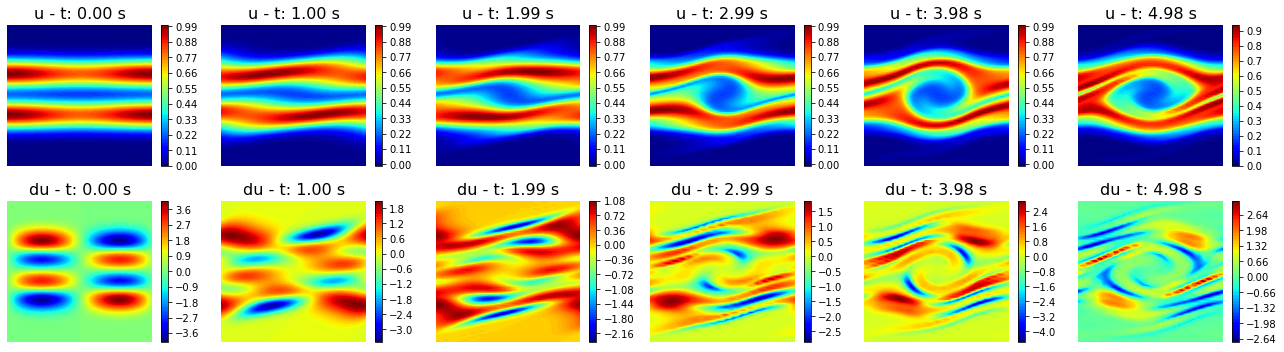

In [11]:
nplot = 6
step_list = np.linspace(0,nt-1,nplot,dtype=int)

fig = plt.figure(figsize=(18,5))
for i,step in enumerate(step_list):
    ax = fig.add_subplot(2,nplot,i+1)
    ax = plt.gca()
    plt.contourf(x_mesh, v_mesh, train_data['data'][0]['x'][step].reshape(nx, nv), 100, cmap=plt.cm.jet)
    plt.colorbar()
    # if i == nplot-1: plt.colorbar()
    ax.set_title(f'u - t: {step/nt*tstop:.2f} s',fontsize=16)
    plt.axis('off')
    
for i,step in enumerate(step_list):
    ax = fig.add_subplot(2,nplot,i+1+nplot)
    ax = plt.gca()
    plt.contourf(x_mesh, v_mesh, train_data['data'][0]['dx'][step].reshape(nx, nv), 100, cmap=plt.cm.jet)
    plt.colorbar()
    # if i == nplot-1: plt.colorbar()
    ax.set_title(f'du - t: {step/nt*tstop:.2f} s',fontsize=16)
    plt.axis('off')
    
plt.tight_layout()
# plt.savefig('./Vlasov1D1V.png')

In [12]:
# save data
if save_data:
    num_case = len(train_data['data'])
    data_path = '/usr/workspace/he10/data/Vlasov1D1V'
    if not os.path.exists(data_path):
        os.makedirs(data_path)
    if num_case > 1:
        if noise_ratio > 0:
            pickle.dump(train_data, open(data_path+f"/{num_case}_m{nx}_tstop{tstop:.2f}_nt{nt}_noise{noise_ratio:.2f}_normalized.p", "wb"))
        else:
            pickle.dump(train_data, open(data_path+f"/{num_case}_m{nx}_tstop{tstop:.2f}_nt{nt}_normalized.p", "wb"))
    else:
        if noise_ratio > 0:
            pickle.dump(train_data, open(data_path+f"/{num_case}_p1_{p1_train[0]:.2f}_p2_{p2_train[0]:.2f}_tstop{tstop:.2f}_nt{nt}_noise{noise_ratio:.2f}_normalized.p", "wb"))
        else:
            pickle.dump(train_data, open(data_path+f"/{num_case}_p1_{p1_train[0]:.2f}_p2_{p2_train[0]:.2f}_tstop{tstop:.2f}_nt{nt}_normalized.p", "wb"))